In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

# Bayesian Statistics 

## Objectives

 * Describe the difference between Frequentist and Bayesian statistics
 * Use Bayes' theorem to calculate posterior probabilities
 * Use Bayesian Updating

## Agenda

* Compare Frequentist and Bayesian approaches
* Introduce Bayes' theorem
* Calculate posterior probabilities

# Review: Frequentist Approach

Let's say that I give you a coin and I ask you to design an experiment to determine whether this coin is fair.  What would you do? 

1.   


<br><br><br><br><br><br><br><br><br>









<details>
<summary> Possible Answer</summary>
<br><br><br><br><br><br><br>
**Design a hypothesis test**
1. State a scientific question 
2. Null Hypothesis: The is coin fair 
3. Alternative Hypothesis: The coin is not fair 
4. Test statistics: Flip a coin 100 times and see how coins are H v T. 
5. Significance level: 0.05 
6. Compute a p-value: $P(x > teststatistic | Binomial(n=100 p = 0.5) )$
7. Conclusion: Reject or fail to reject the null hypothesis 
</details>

The conclusions of the frequentist is a bit disappointing.  Wouldn't it be great if we can define a probability that a coin is fair?  <i>i.e I am 90% sure that your coin is fair.</i>. This is the power of Bayesian statistics. 

# Bayesian Statistics 

When people talk about statistics they usually mean **Frequentist statistics**. All the talk of p-values and confidence intervals and MLE is all Frequentist terminology. But there's another way to think about statistics. Long ago **Bayesian statistics** was controversial; today it's popular enough that any data scientist should understand both.

In general, Frequentist and Bayesians look at statistical problems in fundamentally different ways that are almost inverse of each other.

![](img/bayes_v_frequentist.png)


| <center>Bayesian Perspective</center> | <center>Frequentist Perspective</center>  |   
|---|---|
| "There is no single true hypothesis, but any number of possible hypotheses, each with a probability. The only thing we can know for certain is the observation." |  "There is one true hypothesis, though we don't know what it is. The observation (or data or sample) is one of many that could have been generated." | 

For a Frequentist, it's absurd to talk about the probability of some hypothesis being true; either it is true or it isn't. This is sometimes taken as a criticism of Bayesian statistics.

## Bayes Theorem 

Bayes Theorem is the most important equation in Bayesian Statistics.  It gives us the ability to compute the probabilities of hypothesis given data. 

Suppose we're considering some hypothesis $H$ and we've collected some data $\mathbf{D}$.
$$ P(H|\mathbf{D}) = \frac{P(\mathbf{D}|H) P(H)}{P(\mathbf{D})} $$

Each term has a name.

* $P(H)$ is the *prior probability*
* $P(\mathbf{D}|H)$ is the *likelihood*.
* $P(\mathbf{D})$ is the *normalizing constant*.
* $P(H|\mathbf{D})$ is the *posterior probability*.


If there are a bunch of hypotheses $H_1, H_2, ... H_n$, we could write this as

$$\begin{align}
P(H_i|\mathbf{D}) & = \frac{P(\mathbf{D}|H_i) P(H_i)}{P(\mathbf{D})}\\
         & = \frac{P(\mathbf{D}|H_i) P(H_i)}{\sum_{j=0}^{n} P(\mathbf{D}|H_j) P(H_j)}
\end{align}
$$

Here we see the normalizing constant is the likelihood times the prior summed over all possible hypotheses (using the law of total probability).

In other words, it's the constant (independent of hypothesis) needed to be multiplied by all the numerators so that they all add up to one.

Let's talk through a fun example

<img src='img/silly_example1.png' width=600 />
<img src='img/silly_example2.png' width=600 />
<img src='img/silly_example3.png' width=600 />
<!-- <img src='img/bayes_example.jpg' width=400 /> -->

As you will see in the next example, priors do not always have to be so subjective.  However, it is something you should be aware of when using Bayesian Statistics. 

# Bayesian Updating 

Bayesian updating uses new data on the fly to continuously alter our understanding of the probability of each of the possible hypotheses.  Mathematically what occurs in Bayesian updating is that our prior probability, $P(H)$ will become the posterior $P(H|D)$ when we accumulate new data.  

Let's dive into an example to see how this works:


## Example Bayesian Updating Step by Step 

<img src='img/flip_coin.png' width=600 />

**The problem:**  Let's say we picked one of two coins. One isn't fair ($p(Heads) = 0.45$) while the other one is ($p(Heads) = 0.5$). After a certain number of flips, what is our degree of belief that the results came from fair coin?

### First Coin Flip  

Let's start by flipping a coin once and let's say we get heads and calculate our Posterior:
<img src='http://www.gambling911.com/files/styles/article_image/public/publisher/Super-Bowl-Coin-Toss-Heads-020316L.jpg?itok=L4jga2u' width=100 />

1. **Likelihood:**
We could ask two questions -- what's the likelihood our coin is fair or unfair.  I will compute the probability that our coin is fair in this example, but I could have computed unfair as well. 

$$P(Head|Fair) = 0.5$$
$$P(Head|UnFair) = 0.45$$

2. **Prior:**
The prior is our belief about the probability that our coin is fair or not fair.  Since, we have no data and the coins were split 50-50 our prior is .5. 

$$ P(Fair) = 0.5$$
$$ P(UnFair) = 0.5$$

3. **Marginal Probability:**
The marginal probability acts as a normalization constant. 

$$P(Head) = P(Head|Fair)P(Fair) + P(Head|UnFair)P(UnFair)$$
$$P(Head) = (0.5)(0.5) + (0.45)(0.5) = 0.475$$

In [2]:
marg_prob1 = (0.5)*(0.5) + (0.45)*(0.5)
marg_prob1

0.475

4. **Posterior:**

$$P(Fair|Head) = \frac{P(Head|Fair) P(Fair)}{P(Head)} = \frac{(0.5)(0.5)}{(0.475)}= 0.526$$
$$P(UnFair|Head) = \frac{P(Head|UnFair) P(UnFair)}{P(Head)} = \frac{(0.45)(0.5)}{(0.475)}= 0.474$$


In [35]:
posterior1_fair = 0.5*0.5/marg_prob1
posterior1_unfair = 0.45*0.5/marg_prob1
print(' The probability the coin is fair is {0:.3}.\n \
The probability the coin in unfair is {1:.3}. \n \
The sum of the probabilities is {2:.3}'.format(posterior1_fair, 
                                               posterior1_unfair, 
                                               posterior1_fair + posterior1_unfair) )

 The probability the coin is fair is 0.526.
 The probability the coin in unfair is 0.474. 
 The sum of the probabilities is 1.0


### Second Coin Flip

This time we flip the coin again and we get Tails. 

<img src='http://www.bernstein-plus-sons.com/.dowling/Probability_Module/www.busyteacherscafe.com/Coin%2520Clipart_files/quarter_tail.jpg' width=100 />

1. **Likelihood:**
We could ask two questions -- what's the likelihood our coin is fair or unfair.  I will compute the probability that our coin is fair in this example, but I could have computed unfair as well. 

$$P(Tail|Fair) = 0.5$$
$$P(Tail|UnFair) = 0.55$$

2. **Prior:**
Our prior belief now can be data driven, since we have flipped this coin before! For our prior we will now use the posterior from the previous coin flip:

$$ P(Fair) = 0.526$$
$$ P(UnFair) = 0.474$$

3. **Marginal Probability:**
The marginal probability acts as a normalization constant. 

$$P(Tail) = P(Tail|Fair)P(Fair) + P(Tail|UnFair)P(UnFair)$$
$$P(Tail) = (0.5)(0.5263) + (0.55)(1- 0.5263) = 0.475=0.523$$

In [22]:
marg_prob2 = 0.5*posterior1_fair + 0.55*(posterior1_unfair)
marg_prob2

0.5236842105263158

4. **Posterior:**

$$P(Fair|Tail) = \frac{P(Tail|Fair) P(Fair)}{P(Head)} = \frac{(0.5)(0.526)}{(0.523)}= 0.503$$

$$P(UnFair|Tail) = \frac{P(Tail|UnFair) P(UnFair)}{P(Head)} = \frac{(0.55)(0.473)}{(0.523)}= 0.497$$


In [36]:
posterior2_fair = 0.5*posterior1_fair/marg_prob2
posterior2_unfair = 0.55*posterior1_unfair/marg_prob2

print(' The probability the coin is fair is {0:.3}.\n \
The probability the coin in unfair is {1:.3}. \n \
The sum of the probabilities is {2:.3}'.format(posterior2_fair, 
                                               posterior2_unfair, 
                                               posterior2_fair + posterior2_unfair) )

 The probability the coin is fair is 0.503.
 The probability the coin in unfair is 0.497. 
 The sum of the probabilities is 1.0


### Third Coin Flip

This time we flip the coin again and we get Heads.
<img src='http://www.gambling911.com/files/styles/article_image/public/publisher/Super-Bowl-Coin-Toss-Heads-020316L.jpg?itok=L4jga2u' width=100 />

1. **Likelihood:**
We could ask two questions -- what's the likelihood our coin is fair or unfair.  I will compute the probability that our coin is fair in this example, but I could have computed unfair as well. 

$$P(Head|Fair) = 0.5$$
$$P(Head|UnFair) = 0.45$$

2. **Prior:**
Our prior belief now can be data driven, since we have fliped this coin before! For our prior we will not use the posterior from the previous coin flip 

$$ P(Fair) = 0.503$$
$$ P(UnFair) = 0.497$$

3. **Marginal Probability:**
The marginal probability acts as a normalization constant. 

$$P(Head) = P(Head|Fair)P(Fair) + P(Head|UnFair)P(UnFair)$$
$$P(Head) = (0.5)(0.503) + (0.45)(1-0.497) = 0.475$$

In [39]:
marg_prob3 = (0.5)*(posterior2_fair) + (0.45)*(posterior2_unfair)
marg_prob3

0.4751256281407036

4. **Posterior:**

$$P(Fair|Head) = \frac{P(Head|Fair) P(Fair)}{P(Head)} = 0.529$$
$$P(UnFair|Head) = \frac{P(Head|UnFair) P(UnFair)}{P(Head)} = 0.571$$

In [41]:
posterior3_fair = 0.5*posterior2_fair/marg_prob3
posterior3_unfair = 0.45*posterior2_unfair/marg_prob3

print(' The probability the coin is fair is {0:.3}.\n \
The probability the coin in unfair is {1:.3}. \n \
The sum of the probabilities is {2:.3}'.format(posterior3_fair, 
                                               posterior3_unfair, 
                                               posterior3_fair + posterior3_unfair) )

 The probability the coin is fair is 0.529.
 The probability the coin in unfair is 0.471. 
 The sum of the probabilities is 1.0


## Breakout Exercise 

![](https://ksr-ugc.imgix.net/assets/019/159/570/a8669a017600ac1e9b4cbd4200199856_original.jpg?ixlib=rb-1.1.0&w=680&fit=max&v=1510318889&auto=format&gif-q=50&q=92&s=518be559a1ca962170092a28c4c91595)

**Problem**<br> 
A box contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. A die is selected at random, and the rest are destroyed.

We would like to determine which die I have selected, given only information of what I roll.
    
Using pen and paper answer the following questions:

1. What is the prior associated with choosing any one die?

2. What is the likelihood function? You should assume that the die are all fair.  You only need to write down a likelihood function for one die roll.

3. Say I roll an 8. After one bayesian update, what is the probability that I chose each of the dice?

4. I am curious and decided to roll one more time and get a 5.  What are my updated probabilities? 


## Automating the Process: Updating the Posterior for Many Coin Flips

Going step by step is tedious, so let's automate the process and see how our posterior changes as we continue to flip the unfair coin. 

First we will simulate drawing the a coin out of the bag: 

In [8]:
np.random.seed(37) # try to make it so that we all get the same result

# make the coins and select one
p_fair = 0.5 # don't change
p_not_fair = 0.45 # feel free to change (but don't use 0.5)
p = np.random.choice([p_fair, p_not_fair]) # random.choice selects uniform random number from array 

def indicate_coin_picked(p):
    fair = p == 0.5                             # is coin fair or not
    if fair:
        print("It's the fair coin (p = 0.5).")
    else:
        print(f"It's the unfair coin (p = {p}).")

indicate_coin_picked(p)

It's the unfair coin (p = 0.45).


Now the we have a coin selected (that is unfair) let's run a simulation of flipping this coin several times.  

One thing to note about the code below.  In the step by step example, I chose to compute the probability that the coin was fair.  However, I could have just of easily computed that the probability that the coin is unfair. 

In [9]:
def flip_the_coin(p, flips_lst):
    '''Flips the coin with probability of success p
       and appends to the flips_lst'''
    if np.random.random() <= p:
        flips_lst.append(1) #heads (success)
    else:
        flips_lst.append(0) #tails (failure)
        
def calculate_likelihood(flips_lst):
    '''
    Likelihood of the last flip (aka: the PMF) in the flips_lst 
    given fair, not fair coin
    '''
    result = flips_lst[-1]
    likelihood_fair = stats.bernoulli.pmf(result, p_fair)
    likelihood_not_fair = stats.bernoulli.pmf(result, p_not_fair)
    return [likelihood_fair, likelihood_not_fair]

def calculate_marginal(likelihoods_lst, prior_lst):
    """
    Computed the marginal probability or normalization p
    """
    # marginal = likelihood_fair * prior_fair + likelihood_not_fair * prior_unfair
    marginal = likelihoods_lst[0] * prior_lst[0] + likelihoods_lst[1] * prior_lst[1]
    return marginal

def calculate_posterior(likelihoods_lst, prior_lst):
    '''Calculates the posterior given the likelihoods and prior'''
    marginal = calculate_marginal(likelihoods_lst, prior_lst) 
    posterior = []
    for likelihood, prior in zip(likelihoods_lst, prior_lst):
        posterior.append(likelihood * prior / marginal)  
    return posterior

def plot_pfair_prob(num_flips, p_fair_arr):
    fig, ax = plt.subplots(figsize=(12,4))
    flip_num = np.arange(1, num_flips + 1)
    ax.plot(flip_num, p_fair_arr)
    ax.set_ylim([-0.1, 1.1])
    ax.set_title('Probability of fair coin as a function of flip number')
    ax.set_ylabel('Probability p_fair')
    ax.set_xlabel('Flip number');

It's the unfair coin (p = 0.45).

Posteriors after 4000 trials
Probability Fair 0.022, Not fair 0.978


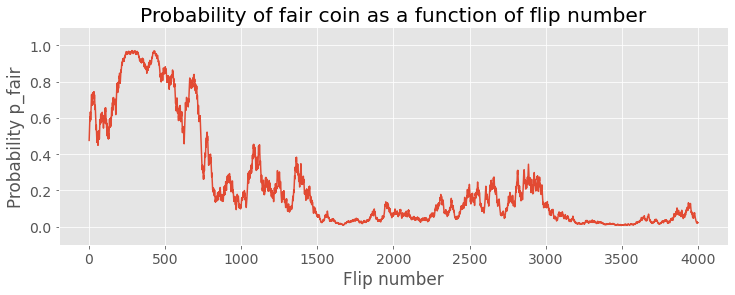

In [44]:
# print whether coin is fair
indicate_coin_picked(p)

# initialize my prior belief
priors = [0.5, 0.5]
flips_lst = []

# set the number of flips
num_flips = 4000
#num_flips = 50
p_fair_arr = np.zeros(num_flips)
for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    likelihoods = calculate_likelihood(flips_lst)
    posteriors = calculate_posterior(likelihoods, priors)
    p_fair_arr[i] = posteriors[0]  # the index is for pulling the P(fair); index = 1 --> P(unfair)
    priors = posteriors  # set my 

# print results of experiment
print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr)


### Just for fun

**Derivation of Bayes Theorem**

$$ P(A \cap B) = P(A) P(B | A)$$
$$-OR-$$
$$ P(A \cap B) = P(B) P(A | B)$$ 

This means the following is true:
$$P(A) P(B | A) = P(B) P(A | B)$$
$$P(B|A) = \frac{P(B) P(A | B)}{P(A)}$$

